In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
basic_file_path = '/Users/liucheng/Desktop/Internship/Fiji_cell_size_1A01_redo at 10 18˚C/data/'

In [3]:
# list all files in the directory
csv_files = os.listdir('/Users/liucheng/Desktop/Internship/Fiji_cell_size_1A01_redo at 10 18˚C/data')

In [4]:
csv_files

['10glu_1A01_21.csv',
 '18glu_1A01_21.csv',
 '10MB_1A01_11.csv',
 '10MB_1A01_13.csv',
 '10glu_1A01_22.csv',
 '18glu_1A01_22.csv',
 '10MB_1A01_12.csv',
 '18pyr_1A01_24.csv',
 '18pyr_1A01_25.csv',
 '18MB_1A01_23.csv',
 '10pyr_1A01_23.csv',
 '18pyr_1A01_22.csv',
 '18pyr_1A01_23.csv',
 '10pyr_1A01_22.csv',
 '18MB_1A01_22.csv',
 '18pyr_1A01_21.csv',
 '10pyr_1A01_21.csv',
 '18MB_1A01_21.csv',
 '18pyr_1A01_11.csv',
 '18MB_1A01_11.csv',
 '10pyr_1A01_11.csv',
 '18pyr_1A01_12.csv',
 '10pyr_1A01_13.csv',
 '18MB_1A01_13.csv',
 '18MB_1A01_12.csv',
 '10pyr_1A01_12.csv',
 '18pyr_1A01_13.csv',
 '10MB_1A01_23.csv',
 '10glu_1A01_12.csv',
 '18glu_1A01_13.csv',
 '10glu_1A01_13.csv',
 '10MB_1A01_22.csv',
 '10glu_1A01_11.csv',
 '18glu_1A01_11.csv',
 '10MB_1A01_21.csv']

In [5]:
# filter out .DS_Store 
filtered_file_list = [file for file in csv_files if file != '.DS_Store' ]
filtered_file_list

['10glu_1A01_21.csv',
 '18glu_1A01_21.csv',
 '10MB_1A01_11.csv',
 '10MB_1A01_13.csv',
 '10glu_1A01_22.csv',
 '18glu_1A01_22.csv',
 '10MB_1A01_12.csv',
 '18pyr_1A01_24.csv',
 '18pyr_1A01_25.csv',
 '18MB_1A01_23.csv',
 '10pyr_1A01_23.csv',
 '18pyr_1A01_22.csv',
 '18pyr_1A01_23.csv',
 '10pyr_1A01_22.csv',
 '18MB_1A01_22.csv',
 '18pyr_1A01_21.csv',
 '10pyr_1A01_21.csv',
 '18MB_1A01_21.csv',
 '18pyr_1A01_11.csv',
 '18MB_1A01_11.csv',
 '10pyr_1A01_11.csv',
 '18pyr_1A01_12.csv',
 '10pyr_1A01_13.csv',
 '18MB_1A01_13.csv',
 '18MB_1A01_12.csv',
 '10pyr_1A01_12.csv',
 '18pyr_1A01_13.csv',
 '10MB_1A01_23.csv',
 '10glu_1A01_12.csv',
 '18glu_1A01_13.csv',
 '10glu_1A01_13.csv',
 '10MB_1A01_22.csv',
 '10glu_1A01_11.csv',
 '18glu_1A01_11.csv',
 '10MB_1A01_21.csv']

In [6]:
def custom_sort_key(file_name):
    # Regular expression to extract parts
    match = re.match (r'(\d+)(\w+)_(\w+)_(\d)(\d)\.csv', file_name)
    if match:
        temperature = int(match.group(1))
        condition = match.group(2)
        strain = match.group(3)
        replicate = match.group(4)
        growth_phase = match.group(5)
        return(temperature, condition, strain, replicate, growth_phase)
    else:
        return(float('inf'),'','',float('inf'),float('inf'))
    
# Sort the files using the custom key
csv_files_sorted = sorted(filtered_file_list, key = custom_sort_key)

In [7]:
# Initialize an empty list to hold dataframes
dataframe =[]
# loop through each csv file and read it into a dataframe
# Loop through each CSV file and read it into a dataframe
for csv_file in csv_files_sorted:
    file_path = os.path.join(basic_file_path, csv_file)
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(file_path, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='iso-8859-1')
    dataframe.append(df)
combined_df = pd.concat(dataframe, ignore_index = True)
combined_df

#rename multiple df in a batch, store dfs in a dictionary
dfs = {f'df{i+1}': df for i,df in enumerate(dataframe)}
# display the keys of the dictionary to verify the changes
print(dfs.keys())
new_names = {'df1':'10MB_11', 'df2':'10MB_12','df3':'10MB_13',
             'df4':'10MB_21', 'df5':'10MB_22', 'df6':'10MB_23',
             'df7':'10glu_11', 'df8':'10glu_12', 'df9':'10glu_13',
             'df10':'10glu_21', 'df11':'10glu_22', 
             'df12':'10pyr_11','df13':'10pyr_12','df14':'10pyr_13',
             'df15':'10pyr_21','df16':'10pyr_22','df17':'10pyr_23',
             'df18':'18MB_11', 'df19':'18MB_12','df20':'18MB_13',
             'df21':'18MB_21', 'df22':'18MB_22', 'df23':'18MB_23',
            'df24':'18glu_11', 'df25':'18glu_13', 'df26':'18glu_21',
            'df27':'18glu_22', 'df28': '18pyr_11','df29':'18pyr_12',
             'df30':'18pyr_13','df31':'18pyr_21','df32':'18pyr_22',
             'df33':'18pyr_23','df34':'18pyr_24','df35':'18pyr_25'}

# rename the dfs by updating the dictionary keys
renamed_dfs = {new_names[old_name]: df for old_name, df in dfs.items()}
print(renamed_dfs.keys())
print(renamed_dfs)

dict_keys(['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10', 'df11', 'df12', 'df13', 'df14', 'df15', 'df16', 'df17', 'df18', 'df19', 'df20', 'df21', 'df22', 'df23', 'df24', 'df25', 'df26', 'df27', 'df28', 'df29', 'df30', 'df31', 'df32', 'df33', 'df34', 'df35'])
dict_keys(['10MB_11', '10MB_12', '10MB_13', '10MB_21', '10MB_22', '10MB_23', '10glu_11', '10glu_12', '10glu_13', '10glu_21', '10glu_22', '10pyr_11', '10pyr_12', '10pyr_13', '10pyr_21', '10pyr_22', '10pyr_23', '18MB_11', '18MB_12', '18MB_13', '18MB_21', '18MB_22', '18MB_23', '18glu_11', '18glu_13', '18glu_21', '18glu_22', '18pyr_11', '18pyr_12', '18pyr_13', '18pyr_21', '18pyr_22', '18pyr_23', '18pyr_24', '18pyr_25'])
{'10MB_11':          Area  Angle  Feret    FeretX    FeretY  FeretAngle  MinFeret  Length
0    1  1.737      0  3.047   361.250    25.500     111.571     0.828     0.0
1    2  3.665      0  4.499   237.833    64.667     149.804     1.126     0.0
2    3  1.911      0  2.502   198.000   186.000    

In [8]:
# # assign each df in my 'renamed_dfs' dictionary a corresponding OD
# # create a mapping between each OD and the df 
# od_mapping ={
#     '10MB_11': 0.339,
#     '10MB_12': 0.073,
#     '10MB_13': 0.012,
#     '10MB_21': 0.339,
#     '10MB_22': 0.054,
#     '10MB_23': 0.017,
#     '10glu_11': 0.361,
#     '10glu_12': 0.056,
#     '10glu_13': 0.017,
#     '10glu_21': 0.306,
#     '10glu_22': 0.036,
#     '10pyr_11': 0.137,
#     '10pyr_12': 0.073,
#     '10pyr_13': 0.317,
#     '10pyr_21': 0.120,
#     '10pyr_22': 0.040,
#     '10pyr_23': 0.301,
#     '18MB_11': 2.211,
#     '18MB_12': 2.172,
#     '18MB_13': 1.600,
#     '18MB_21': 2.298,
#     '18MB_22': 2.141,
#     '18MB_23': 1.837,
#     '18glu_11': 0.504,
#     '18glu_13': 0.049,
#     '18glu_21': 0.512,
#     '18glu_22': 0.112,
#     '18pyr_11': 0.037,
#     '18pyr_12': 0.039,
#     '18pyr_13': 0,
#     '18pyr_21': 0.131,
#     '18pyr_22': 0.023,
#     '18pyr_23': 0.006,
#     '18pyr_24': 0.401,
#     '18pyr_25': 0.458
# }

# # Initialize lists to store OD values, FERET values, and MINFERET values
# od_values = []
# feret_values = []
# minferet_values = []


# # Extract FERET and MINFERET values from each dataframe in renamed_dfs
# for od_label, df in renamed_dfs.items():
#     od_value = od_mapping[od_label]  # Get the OD value from od_mapping
    
#     # Append OD value
#     od_values.extend([od_value] * len(df))  # Repeat OD value for each row
    
    
#     # Append all FERET and MINFERET values from the dataframe
#     feret_values.extend(df['Feret'])
#     minferet_values.extend(df['MinFeret'])

# # Create a DataFrame for plotting
# plot_data = pd.DataFrame({
#     'OD': od_values,
#     'Feret': feret_values,
#     'MinFeret': minferet_values
# })

# # Plotting with Seaborn
# plt.figure(figsize=(10, 6))

# # Plot all FERET data points
# sns.lineplot(x='OD', y='Feret', data=plot_data, ci='sd', label='Feret', marker='o')

# # Plot all MINFERET data points
# sns.lineplot(x='OD', y='MinFeret', data=plot_data, ci='sd', label='MinFeret', marker='o')

# plt.title('OD Values vs FERET and MINFERET Measurements')
# plt.xlabel('OD Values')
# plt.ylabel('Measurements (µm)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

# plt.show()
             

/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_23913/660824600.py:78: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='OD', y='Feret', hue='Temperature',style='Carbon Source',data=filtered_df, ci='sd', marker='o')


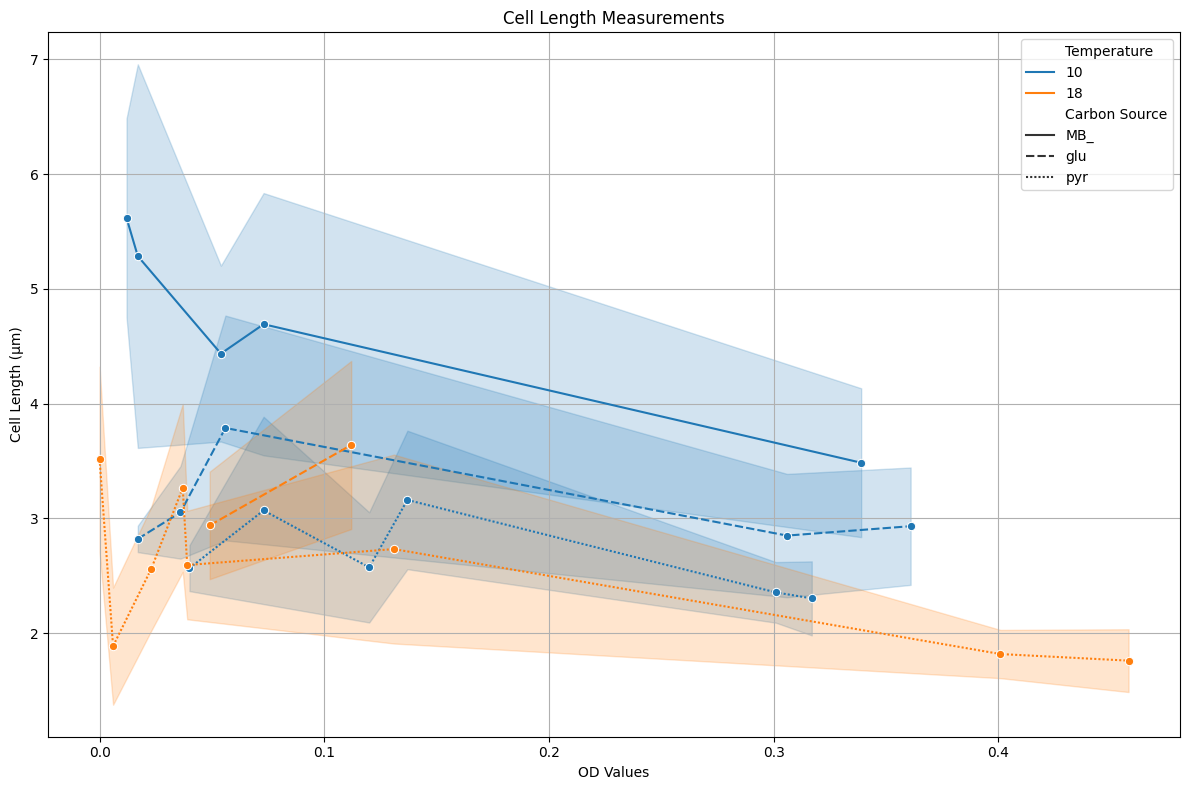

In [16]:
# assign each df in my 'renamed_dfs' dictionary a corresponding OD
# create a mapping between each OD and the df 
od_mapping ={
    '10MB_11': 0.339,
    '10MB_12': 0.073,
    '10MB_13': 0.012,
    '10MB_21': 0.339,
    '10MB_22': 0.054,
    '10MB_23': 0.017,
    '10glu_11': 0.361,
    '10glu_12': 0.056,
    '10glu_13': 0.017,
    '10glu_21': 0.306,
    '10glu_22': 0.036,
    '10pyr_11': 0.137,
    '10pyr_12': 0.073,
    '10pyr_13': 0.317,
    '10pyr_21': 0.120,
    '10pyr_22': 0.040,
    '10pyr_23': 0.301,
    '18MB_11': 2.211,
    '18MB_12': 2.172,
    '18MB_13': 1.600,
    '18MB_21': 2.298,
    '18MB_22': 2.141,
    '18MB_23': 1.837,
    '18glu_11': 0.504,
    '18glu_13': 0.049,
    '18glu_21': 0.512,
    '18glu_22': 0.112,
    '18pyr_11': 0.037,
    '18pyr_12': 0.039,
    '18pyr_13': 0,
    '18pyr_21': 0.131,
    '18pyr_22': 0.023,
    '18pyr_23': 0.006,
    '18pyr_24': 0.401,
    '18pyr_25': 0.458
}

# Initialize lists to store OD values, FERET values, and MINFERET values
od_values = []
feret_values = []
minferet_values = []
temperature_values = []
carbon_source_values = []


# Extract FERET and MINFERET values from each dataframe in renamed_dfs
for od_label, df in renamed_dfs.items():
    od_value = od_mapping[od_label]  # Get the OD value from od_mapping
    #print(od_label)
    # Append OD value
    od_values.extend([od_value] * len(df))  # Repeat OD value for each row
    temperature =od_label[:2]
    carbon_source = od_label[2:5]
    temperature_values.extend([temperature] *len(df))
    carbon_source_values.extend([carbon_source]*len(df))
    # Append all FERET and MINFERET values from the dataframe
    feret_values.extend(df['Feret'])
    minferet_values.extend(df['MinFeret']
                          )
    
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'OD': od_values,
    'Feret': feret_values,
    'MinFeret': minferet_values,
    'Temperature':temperature_values,
    'Carbon Source':carbon_source_values
})

filtered_df = plot_data[plot_data['OD']<= 0.5]
# Plotting with Seaborn
plt.figure(figsize=(12, 8))

# Plot all FERET data points
sns.lineplot(x='OD', y='Feret', hue='Temperature',style='Carbon Source',data=filtered_df, ci='sd', marker='o')

# Plot all MINFERET data points
#sns.lineplot(x='OD', y='MinFeret', data=plot_data, ci='sd', label='MinFeret', marker='D')

plt.title('Cell Length Measurements')
plt.xlabel('OD Values')
plt.ylabel('Cell Length (µm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/liucheng/Desktop/My_thesis_2024/Plots/cell_length.pdf',format='pdf')
plt.show()

In [11]:
print(plot_data)

        OD  Feret  MinFeret Temperature Carbon Source
0    0.339  3.047     0.828          10           MB_
1    0.339  4.499     1.126          10           MB_
2    0.339  2.502     0.982          10           MB_
3    0.339  3.830     1.335          10           MB_
4    0.339  3.581     1.160          10           MB_
..     ...    ...       ...         ...           ...
907  0.458  1.895     0.963          18           pyr
908  0.458  1.975     0.942          18           pyr
909  0.458  1.876     0.705          18           pyr
910  0.458  1.984     0.703          18           pyr
911  0.458  1.360     0.651          18           pyr

[912 rows x 5 columns]


/var/folders/pq/y12h6ypd4750kqt2w5clmhq00000gn/T/ipykernel_23913/2744732031.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='OD', y='MinFeret', hue='Temperature',style='Carbon Source',data=filtered_df, ci='sd', marker='o')


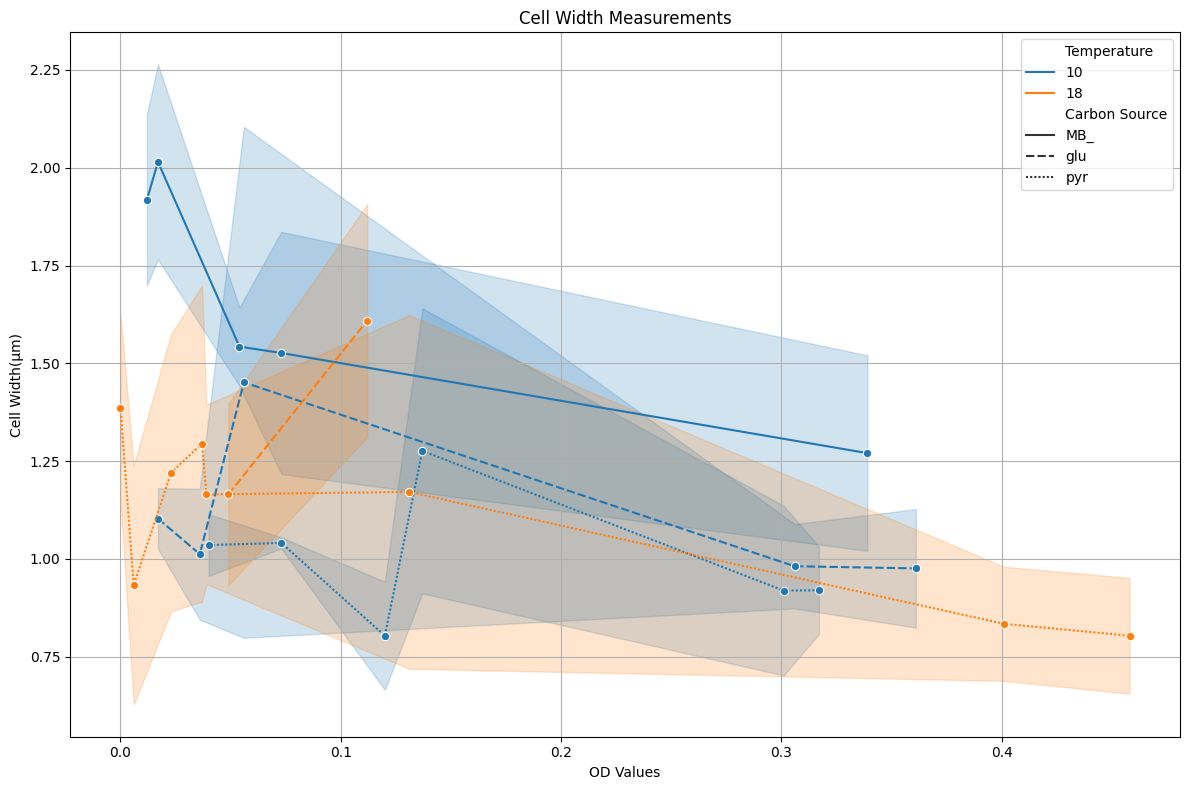

In [17]:
# assign each df in my 'renamed_dfs' dictionary a corresponding OD
# create a mapping between each OD and the df 
od_mapping ={
    '10MB_11': 0.339,
    '10MB_12': 0.073,
    '10MB_13': 0.012,
    '10MB_21': 0.339,
    '10MB_22': 0.054,
    '10MB_23': 0.017,
    '10glu_11': 0.361,
    '10glu_12': 0.056,
    '10glu_13': 0.017,
    '10glu_21': 0.306,
    '10glu_22': 0.036,
    '10pyr_11': 0.137,
    '10pyr_12': 0.073,
    '10pyr_13': 0.317,
    '10pyr_21': 0.120,
    '10pyr_22': 0.040,
    '10pyr_23': 0.301,
    '18MB_11': 2.211,
    '18MB_12': 2.172,
    '18MB_13': 1.600,
    '18MB_21': 2.298,
    '18MB_22': 2.141,
    '18MB_23': 1.837,
    '18glu_11': 0.504,
    '18glu_13': 0.049,
    '18glu_21': 0.512,
    '18glu_22': 0.112,
    '18pyr_11': 0.037,
    '18pyr_12': 0.039,
    '18pyr_13': 0,
    '18pyr_21': 0.131,
    '18pyr_22': 0.023,
    '18pyr_23': 0.006,
    '18pyr_24': 0.401,
    '18pyr_25': 0.458
}

# Initialize lists to store OD values, FERET values, and MINFERET values
od_values = []
feret_values = []
minferet_values = []
temperature_values = []
carbon_source_values = []


# Extract FERET and MINFERET values from each dataframe in renamed_dfs
for od_label, df in renamed_dfs.items():
    od_value = od_mapping[od_label]  # Get the OD value from od_mapping
    #print(od_label)
    # Append OD value
    od_values.extend([od_value] * len(df))  # Repeat OD value for each row
    temperature =od_label[:2]
    carbon_source = od_label[2:5]
    temperature_values.extend([temperature] *len(df))
    carbon_source_values.extend([carbon_source]*len(df))
    # Append all FERET and MINFERET values from the dataframe
    feret_values.extend(df['Feret'])
    minferet_values.extend(df['MinFeret']
                          )
    
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'OD': od_values,
    'Feret': feret_values,
    'MinFeret': minferet_values,
    'Temperature':temperature_values,
    'Carbon Source':carbon_source_values
})

# Plotting with Seaborn
plt.figure(figsize=(12, 8))

# Plot all FERET data points
sns.lineplot(x='OD', y='MinFeret', hue='Temperature',style='Carbon Source',data=filtered_df, ci='sd', marker='o')

# Plot all MINFERET data points
#sns.lineplot(x='OD', y='MinFeret', data=plot_data, ci='sd', label='MinFeret', marker='D')

plt.title('Cell Width Measurements')
plt.xlabel('OD Values')
plt.ylabel('Cell Width(µm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/liucheng/Desktop/My_thesis_2024/Plots/cell_width.pdf',format='pdf')
plt.show()